## once you have TSNE for full dataset, add it as new column in dataframe. do the same for PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline 

from openTSNE import TSNE

In [2]:
df = pd.read_csv('data/full_labels_df.csv', error_bad_lines=False)

In [3]:
loaded = np.load('data/full_image_arr.npz')

In [4]:
bw_img = loaded['b']

In [5]:
# normalize
# not needed when all data on same scale, but good practice
bw_img = bw_img/255

In [6]:
tsne2 = TSNE(n_components=2, n_iter=1000, perplexity=100)

In [ ]:
XX = tsne2.fit(bw_img[0:10000])

In [7]:
ZZ = tsne2.fit(bw_img)

In [8]:
np.save('tsne_full.npy', ZZ)

In [12]:
colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'black'}
df['color'] = df.loc[:,'masterCategory'].apply(lambda x: colors[x])
df['color']

0        orange
1        orange
2        orange
3        orange
4        orange
5        orange
6          teal
7           red
8           red
9          teal
10       orange
11         teal
12       orange
13         teal
14         teal
15          red
16       orange
17        black
18          red
19         teal
20        black
21         teal
22       orange
23       orange
24          red
25          red
26       orange
27         teal
28         teal
29         teal
          ...  
32171      teal
32172    orange
32173       red
32174       red
32175       red
32176    orange
32177      teal
32178    orange
32179      teal
32180      teal
32181       red
32182       red
32183       red
32184      teal
32185       red
32186    orange
32187      teal
32188       red
32189      teal
32190    orange
32191       red
32192      teal
32193       red
32194      teal
32195     black
32196    orange
32197       red
32198       red
32199     black
32200      teal
Name: color, Length: 322

In [13]:
df.masterCategory.value_counts()

Apparel          13135
Footwear          9006
Accessories       8031
Personal Care     2029
Name: masterCategory, dtype: int64

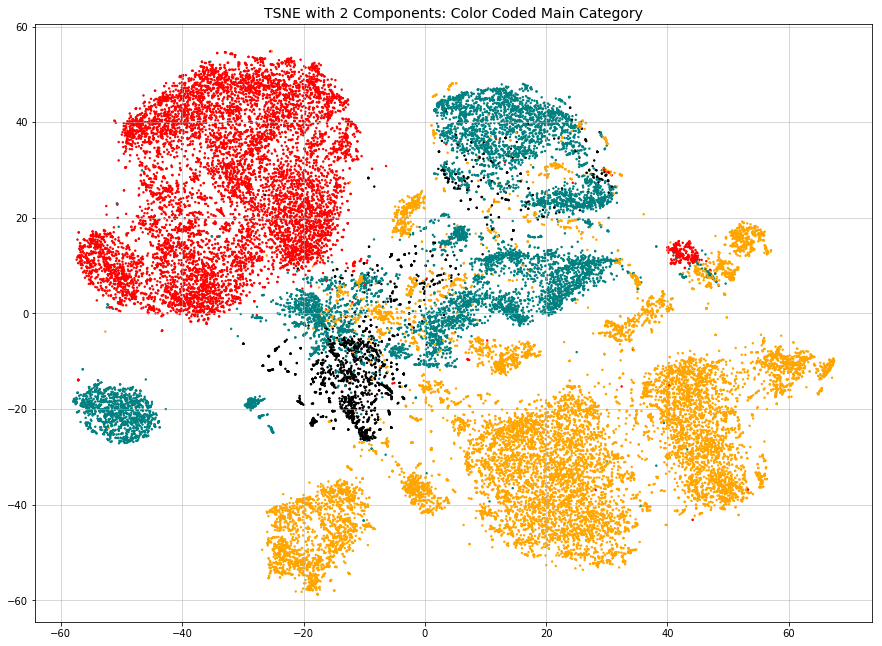

In [14]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(ZZ[:,0],ZZ[:,1], s=2, c= df['color']);
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=14)
ax.grid(which='both', axis='both', linewidth=.5)
#ax.legend(fontsize=12, markerscale=4)



### Alternative code for including legend

KeyError: 'black'

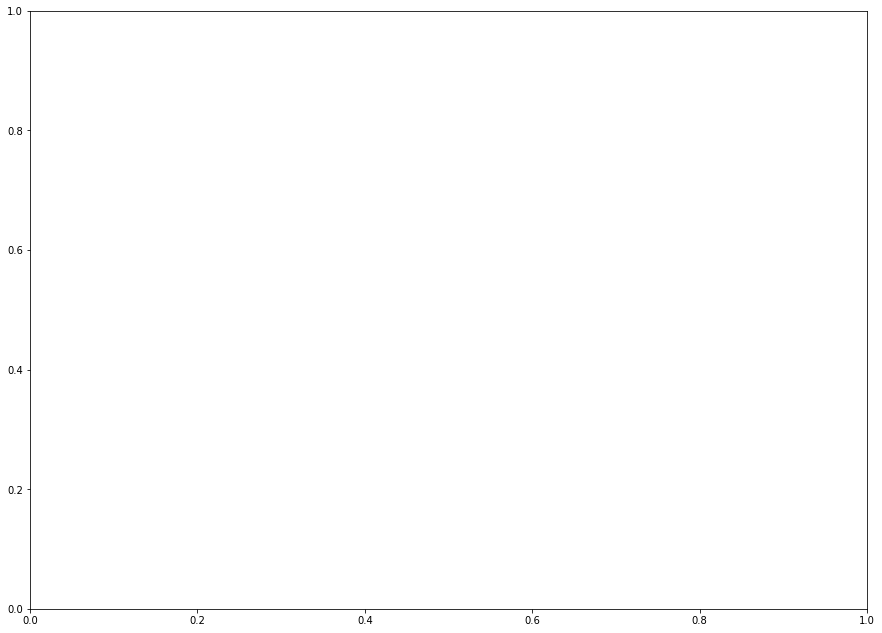

In [17]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = XX[:,0]
scatter_y = XX[:,1]
group = np.array(df['color'][0:500])
cdict = {0: 'orange', 1: 'teal', 2: 'red', 3:'blue'}

fig, ax = plt.subplots(figsize=(15,11))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], color = cdict[g], label = cc_inv[g], s = 5)
ax.legend(fontsize=12, markerscale=4)
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=15)
ax.grid(which='both', axis='both', linewidth=.5)
plt.show()

### Highlight Accessory Subset

In [33]:
accessory_subcats = df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory']

In [36]:
dct_accessory_subcat = {}
for i, cat in enumerate(accessory_subcats.index):
    dct_accessory_subcat[i]= cat
dct_accessory_subcat

{0: 'Bags',
 1: 'Eyewear',
 2: 'Headwear',
 3: 'Jewellery',
 4: 'Ties',
 5: 'Watches'}

In [20]:
# red = '#DF0101'
# dk_blue = '#0404B4'
# dk_purple = '#8904B1'
# dk_green = '#298A08'
# pink = '#FA58F4'
# yellow = '#F7D358'
# lt_blue = '#81BEF7'
# lt_purple = '#D0A9F5'
# orange = '#FE9A2E'
# aqua = '#01DFD7'
# lt_green = '#01DF01'
# brown = '#8A4B08'
# black = '#000000'
# grey = '#D8D8D8'
# color_list = [black, dk_blue, lt_green, orange, dk_purple, aqua, yellow, dk_green, lt_blue, lt_purple, brown, red, grey]

In [37]:
colors = ['teal', 'orange', 'red', 'black', 'brown', '#F7D358']

In [40]:
color_code_accessories = {v:colors[i] for i, v in enumerate(list(dct_accessory_subcat.values()))}

In [41]:
color_code_accessories

{'Bags': 'teal',
 'Eyewear': 'orange',
 'Headwear': 'red',
 'Jewellery': 'black',
 'Ties': 'brown',
 'Watches': '#F7D358'}

In [42]:
df['acc_color'] = df.loc[:,'subCategory'].apply(lambda x: color_code_accessories[x] if x in color_code_accessories.keys() else grey )

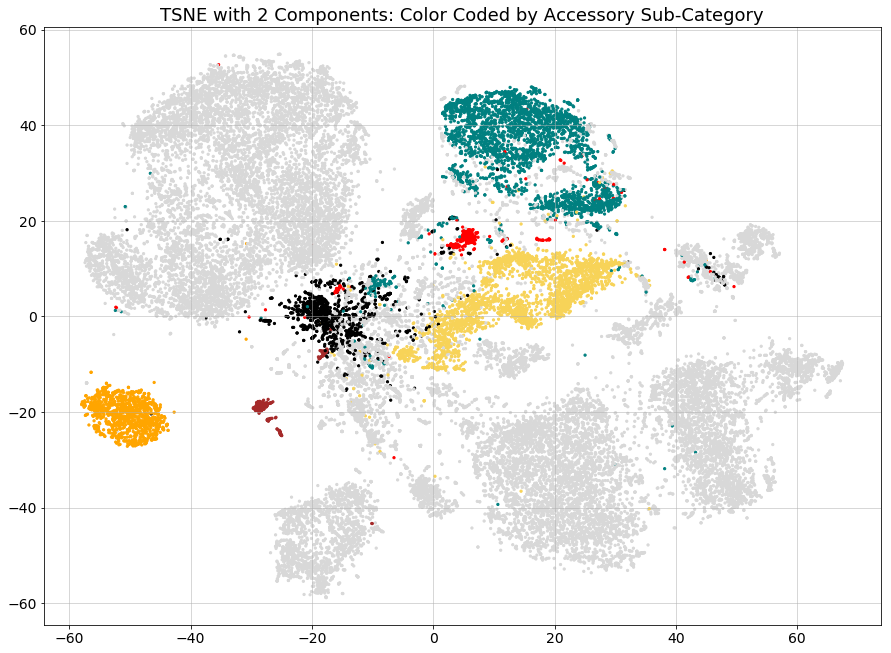

In [43]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(ZZ[:,0],ZZ[:,1], s=5, c= df['acc_color']);
ax.set_title('TSNE with 2 Components: Color Coded by Accessory Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

In [44]:
import numpy as np
from matplotlib import pyplot as plt

scatter_x = XX[:,0]
scatter_y = XX[:,1]
group = np.array(wear_df['color_code_accessories'][0:5000])
cdict = {0: 'orange', 1: 'teal', 2: 'red'}

fig, ax = plt.subplots(figsize=(15,11))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], color = cdict[g], label = cc_inv[g], s = 5)
ax.legend(fontsize=12, markerscale=4)
ax.set_title('TSNE with 2 Components: Color Coded Main Category', fontsize=15)
ax.grid(which='both', axis='both', linewidth=.5)
plt.show()

NameError: name 'XX' is not defined

### attempt to make it a function 

In [66]:
def plot_subcat_tsne(df, XX, cat_list):
    cat_num = {cat:idx for idx, cat in enumerate(cat_list)}
    df.loc[:,'color_code'] = df.copy().loc[:,'subCategory'].apply(lambda x: cat_num[x] if x in cat_num.keys() else len(cat_list)) 
    cc_inv = {v:k for k, v in cat_num.items()}
    x = XX[:,0]
    y = XX[:,1]
    group = np.array(df['color_code'][0:5000])
    col_list = color_list[0:len(cat_list)+1]
    cdict = {i:col_list[i] for i in range(len(col_list))}

    fig, ax = plt.subplots()
    for g in np.unique(group):
        ix = np.where(group == g)
        ax.scatter(x[ix], y[ix], color = cdict[g], label = cc_inv[g], s = 5)
    ax.legend()
    plt.show()

KeyError: 13

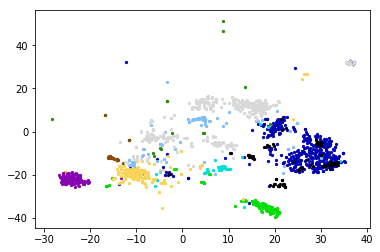

In [67]:
plot_subcat_tsne(wear_df, XX, list(dct_accessory_subcat.keys()))

## footwear subcategories

In [97]:
footwear_subcats = wear_df[wear_df['masterCategory']=='Footwear'].groupby('subCategory').count()['masterCategory']
footwear_subcats

subCategory
Flip Flops     915
Sandal         963
Shoes         7344
Name: masterCategory, dtype: int64

In [101]:
dct_footwear_subcat = {}
for cat in footwear_subcats.index:
    dct_footwear_subcat[cat] = footwear_subcats[cat]
list(dct_footwear_subcat.keys())

['Flip Flops', 'Sandal', 'Shoes']

In [128]:
color3 = ['orange', red, 'teal']
color_code_footwear = {k:color3[i] for i, k in enumerate(list(dct_footwear_subcat.keys()))}
color_code_footwear

{'Flip Flops': 'orange', 'Sandal': '#DF0101', 'Shoes': 'teal'}

In [129]:
wear_df['shoe_color'] = wear_df.loc[:,'subCategory'].apply(lambda x: color_code_footwear[x] if x in color_code_footwear.keys() else grey )

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


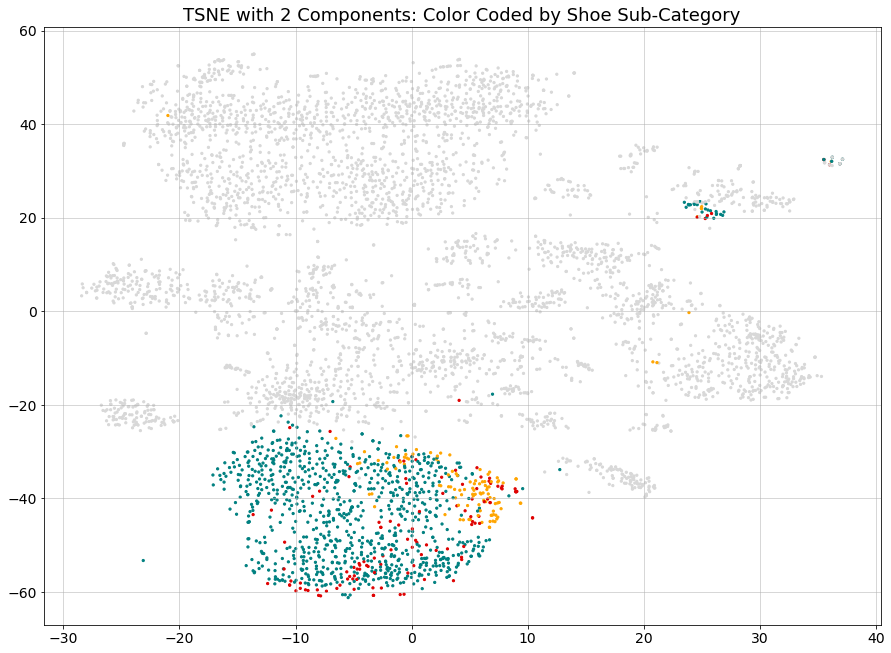

In [130]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=5, c= wear_df['shoe_color'][0:5000]);
ax.set_title('TSNE with 2 Components: Color Coded by Shoe Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

## apparel subcategories

In [96]:
apparel_subcats = wear_df[wear_df['masterCategory']=='Apparel'].groupby('subCategory').count()['masterCategory']
apparel_subcats

subCategory
Apparel Set                   106
Bottomwear                   2694
Dress                         478
Innerwear                    1808
Loungewear and Nightwear      470
Saree                         427
Socks                          12
Topwear                     15405
Name: masterCategory, dtype: int64

In [105]:
dct_apparel_subcat = {}
for cat in apparel_subcats.index:
    dct_apparel_subcat[cat] = apparel_subcats[cat]
print(len(dct_apparel_subcat.keys()))
list(dct_apparel_subcat.keys())

8


['Apparel Set',
 'Bottomwear',
 'Dress',
 'Innerwear',
 'Loungewear and Nightwear',
 'Saree',
 'Socks',
 'Topwear']

In [156]:
color8 = ['blue', '#AE1400', dk_purple, '#FF5026', '#78E5D6', 'magenta', '#FFD42E', '#3D9C9F' ]
color_code_apparel = {k:color8[i] for i, k in enumerate(list(dct_apparel_subcat.keys()))}
color_code_apparel

{'Apparel Set': 'blue',
 'Bottomwear': '#AE1400',
 'Dress': '#8904B1',
 'Innerwear': '#FF5026',
 'Loungewear and Nightwear': '#78E5D6',
 'Saree': 'magenta',
 'Socks': '#FFD42E',
 'Topwear': '#3D9C9F'}

In [157]:
wear_df['app_color'] = wear_df.loc[:,'subCategory'].apply(lambda x: color_code_apparel[x] if x in color_code_apparel.keys() else grey )

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


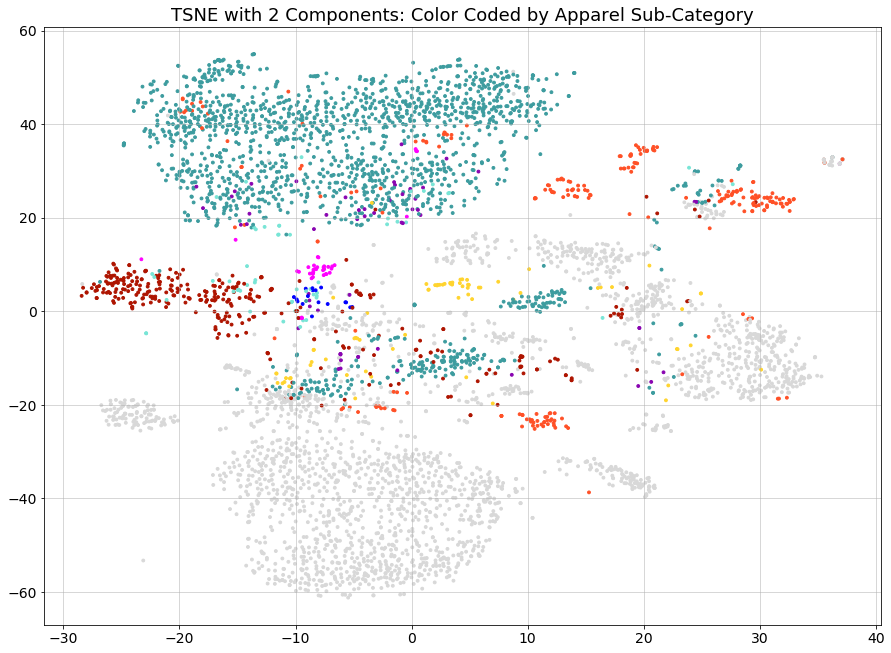

In [159]:
fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(XX[:,0],XX[:,1], s=8, c= wear_df['app_color'][0:5000]);
ax.set_title('TSNE with 2 Components: Color Coded by Apparel Sub-Category', fontsize=18)
ax.grid(which='both', axis='both', linewidth=.5)
ax.tick_params(labelsize=14)

In [160]:
hh = XX[np.where((XX[:,0] < -20)&(XX[:,1] < -15))]
hh

array([[-22.774124, -20.346182],
       [-20.455362, -23.625578],
       [-22.704477, -20.007967],
       [-21.978806, -22.644001],
       [-24.94574 , -19.697615],
       [-20.140623, -23.411764],
       [-22.597904, -22.071913],
       [-24.71176 , -21.912083],
       [-23.97537 , -18.995596],
       [-21.50517 , -23.783325],
       [-24.856987, -20.28332 ],
       [-25.253538, -21.0575  ],
       [-22.442427, -21.133547],
       [-22.312042, -23.397024],
       [-23.076443, -19.381037],
       [-25.721485, -22.529123],
       [-22.042685, -23.179192],
       [-26.279638, -23.448757],
       [-25.633547, -23.135523],
       [-23.662281, -21.554241],
       [-22.467157, -22.133026],
       [-20.41098 , -22.470367],
       [-22.715864, -21.186441],
       [-21.57492 , -24.442022],
       [-25.371437, -21.58458 ],
       [-21.338032, -23.152035],
       [-25.021261, -20.69515 ],
       [-24.990335, -22.771133],
       [-22.976732, -21.455084],
       [-23.11848 , -53.333103],
       [-2